In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
train_ds = np.load('../input/ift3395-6390-quickdraw/train.npz')
train_x = train_ds['arr_0']
train_y = train_ds['arr_1']

train_x.shape, train_y.shape

((1500, 784), (1500,))

In [3]:
test_x = np.load('../input/ift3395-6390-quickdraw/test.npz')['arr_0']
test_x.shape

(60000, 784)

In [4]:
unique, counts = np.unique(train_y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 250]
 [  1 250]
 [  2 250]
 [  3 250]
 [  4 250]
 [  5 250]]


### Display image from each class

In [6]:
def plot_example(labels, num_classes):
    ex = []
    for i in range(6):
        ex.append(np.where(labels==i)[0][0])
    
    for i in ex:
        plt.imshow(train_x[i].reshape(28, 28))
        plt.title(train_y[i])
        plt.show()

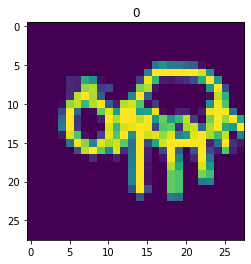

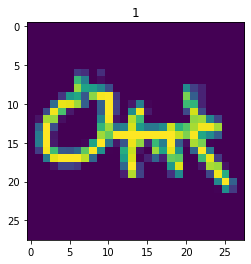

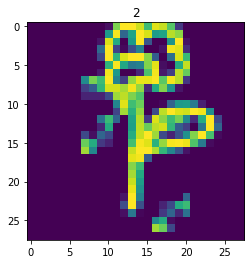

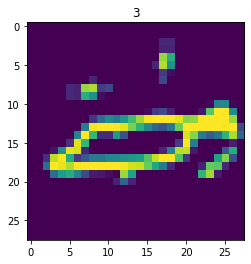

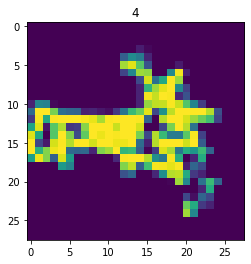

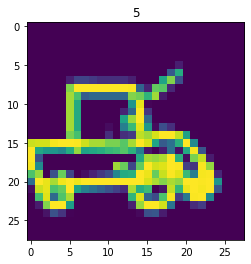

In [7]:
plot_example(train_y, 6)

### Pixel Importance

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x/255., train_y, test_size=0.2, stratify=train_y, random_state=0)

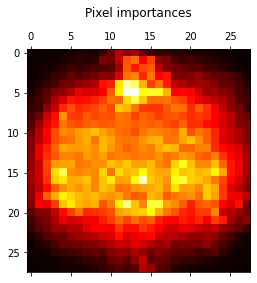

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
importances = importances.reshape((28,28))
plt.matshow(importances, cmap=plt.cm.hot);
plt.title('Pixel importances\n');

### Install autokeras and keras-tuner

In [11]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc4

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc4) to /tmp/pip-req-build-_gjiw0pf
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc4-py3-none-any.whl size=92363 sha256=581d5395d49e957594049eb557ff72ab5f85902388dab79f94d618ffe839ca54
  Stored in directory: /tmp/pip-ephem-wheel-cache-erled7mk/wheels/82/ac/bd/3c81a67208c3dbbd1998f302c6ada5985d5422cf55d81153d0
Successfully built keras-tuner
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2
    Uninstalling keras-tuner-1.0.2:
      Successfully uninstalled keras-tuner-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autokeras 1.0.12 requires keras-tuner>=1.0.2, but you have keras-tuner 1.0.2rc4 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [12]:
!pip install --upgrade keras-tuner

     |████████████████████████████████| 62 kB 506 kB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=690a6b700c116e378130d8435d93ec1d4860c89faa46bd27295b9e9d26125d71
  Stored in directory: /root/.cache/pip/wheels/78/e2/80/7fe373cad54ad22b06d0d6204cbc29cead9e69bb2680327775
Successfully built keras-tuner
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc4
    Uninstalling keras-tuner-1.0.2rc4:
      Successfully uninstalled keras-tuner-1.0.2rc4
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [10]:
!pip install autokeras

     |████████████████████████████████| 164 kB 885 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
train_x = train_x/255
train_x = train_x.reshape(-1,28,28)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.1, shuffle=True)

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak

### To train the model

In [16]:
clf = ak.ImageClassifier(overwrite=True, max_trials=3)

In [17]:
clf.fit(x_train, y_train,validation_data=(x_val, y_val))

Trial 3 Complete [00h 23m 28s]
val_loss: 0.698908805847168

Best val_loss So Far: 0.698908805847168
Total elapsed time: 00h 26m 55s


In [19]:
model = clf.export_model()

In [20]:
try:
    model.save("model_autokeras", save_format="tf")
    print('try')
except:
    model.save("model_autokeras.h5")
    print('except')

try


In [21]:
del(clf)

In [22]:
%%time
model.predict(x_val)

CPU times: user 4.95 s, sys: 6.28 ms, total: 4.96 s
Wall time: 4.98 s


array([[3.34262699e-02, 8.35484266e-01, 9.75109413e-02, 2.87266262e-02,
        4.45805537e-03, 3.93804541e-04],
       [9.93603647e-01, 1.71512773e-03, 1.16423983e-03, 1.82330361e-04,
        2.95463251e-03, 3.80032114e-04],
       [2.04605367e-02, 5.56862891e-01, 9.41584408e-02, 5.96740842e-02,
        2.45709732e-01, 2.31343340e-02],
       [2.15612026e-03, 2.57982465e-04, 9.96106088e-01, 4.54112946e-04,
        1.45098384e-04, 8.80609849e-04],
       [1.69832003e-03, 3.55573483e-02, 4.95012896e-03, 6.09348179e-04,
        5.88544365e-03, 9.51299429e-01],
       [1.56255637e-03, 7.43178248e-01, 1.57455467e-02, 7.80925602e-02,
        1.16014205e-01, 4.54068668e-02]], dtype=float32)

In [23]:
!tar -zcvf outputname.tar.gz /kaggle/working/model_autokeras

tar: Removing leading `/' from member names
/kaggle/working/model_autokeras/
/kaggle/working/model_autokeras/variables/
/kaggle/working/model_autokeras/variables/variables.index
/kaggle/working/model_autokeras/variables/variables.data-00000-of-00001
/kaggle/working/model_autokeras/saved_model.pb
/kaggle/working/model_autokeras/assets/


In [24]:
y_test = np.argmax(model.predict(x_val),1)

In [25]:
test_x = test_x/255

### To load the saved weights

In [26]:
from tensorflow.keras.models import load_model

loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

In [27]:
test_x = test_x.reshape(-1,28,28)

In [28]:
y_test = np.argmax(loaded_model.predict(test_x), 1)

### Submission

In [31]:
df = pd.read_csv('../input/ift3395-6390-quickdraw/sample_submission.csv')
df.head()

,Id,Category
0,0,1.0
1,1,0.0
2,2,1.0
3,3,4.0
4,4,2.0


In [32]:
sub = pd.DataFrame([])
sub['Category'] = y_test
sub = sub.reset_index()
sub.columns = ['Id','Category']
sub.to_csv('./sub_1496.csv',index=False)